# Classification (Part I)

**Introduction to Python for Data Science** \
Course with Hacktiv8

***

**Sesi 12**

Sabtu, 19 Juni 2021 • 09:00 - 12:00 WIB

- Logistic Regression
- K-Nearest Neighbor (KNN)

***

## Logistic Regression

_Linear Regression_ dapat sangat berguna saat kita mencoba memprediksi nilai keluaran _continuous_ dari _linear relationship_. Tetapi nilai keluaran _Logistic Regression_ berada di antara 0 dan 1. Karenanya, _output continuous value_ yang tidak berada dalam kisaran antara 0 dan 1 tidak berfungsi dengan _Logistic Regression_.

Jenis-jenis Logistic Regression:

1. **Binary Logistic Regression**<br>
   Variabel dependen hanya memiliki dua kemungkinan hasil/kelas.<br>
   Contoh: Male or Female.

2. **Multinomial Logistic Regression**<br>
   Variabel dependen hanya memiliki dua kemungkinan hasil/kelas 3 atau lebih tanpa urutan.<br>
   Contoh: Predicting food quality (great, good, bad).

3. **Ordinal Logistic Regression**<br>
   Variabel dependen hanya memiliki dua 3 atau lebih kemungkinan hasil/kelas dengan pengurutan.<br>
   Contoh: Star rating from 1 to 5


### Single-Variate

Hanya ada satu variabel independen (fitur)

1. Import Packages, Functions, and Classes:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

2. Get Data

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

print(x, y, sep='\n\n')

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]

[0 0 0 0 1 1 1 1 1 1]


3. Create a Model and Train It

In [3]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [4]:
print('Classes:', model.classes_)
print('Weights:', model.coef_)
print('Bias:', model.intercept_)

Classes: [0 1]
Weights: [[0.51491375]]
Bias: [-1.04608067]


4. Evaluate the Model

In [5]:
pred = model.predict(x)
print('Target class:', y)
print('Prediction:  ', pred)

Target class: [0 0 0 0 1 1 1 1 1 1]
Prediction:   [0 0 0 1 1 1 1 1 1 1]


In [6]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [7]:
model.predict_proba(x).argmax(1)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Mendapatkan akurasi model:

In [8]:
print('Accuracy:', model.score(x, y))

Accuracy: 0.9


**Confusion Matrix**

Dalam kasus klasifikasi biner, _confusion matrix_ menunjukkan angka-angka berikut ini:

- **True Negatives** (TN, kiri atas): Terprediksi **negatif** (0) secara **tepat**
- **False Negatives** (FN, kiri bawah): Terprediksi **negatif** (0) secara **tidak tepat**
- **False Positives** (FP, kanan atas): Terprediksi **positif** (1) secara **tidak tepat**
- **True Positives** (TP, kanan bawah): Terprediksi **positif** (1) secara **tepat**

In [9]:
cm = confusion_matrix(y, pred)
print(cm)

[[3 1]
 [0 6]]


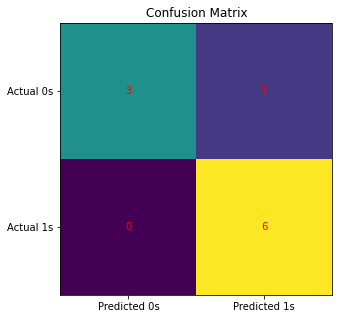

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.title('Confusion Matrix')
plt.show()

Mendapatkan laporan yang lebih komprehensif tentang klasifikasi:

In [11]:
print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



**Improve The Model**

C=10.0

Weights: [[1.12066084]]
Bias: [-3.51335372]
Prediction Probabilities:
 [[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]
Target class: [0 0 0 0 1 1 1 1 1 1]
Prediction:   [0 0 0 0 1 1 1 1 1 1]
Confusion Matrix:
 [[4 0]
 [0 6]]


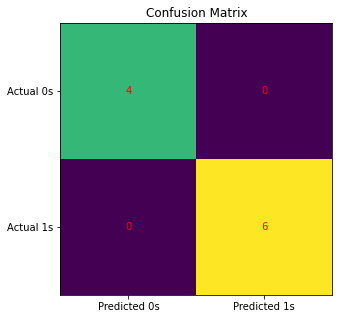

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [12]:
imp_model = LogisticRegression(solver='liblinear', random_state=0, C=10.0)
imp_model.fit(x, y)

print('Weights:', imp_model.coef_)
print('Bias:', imp_model.intercept_)

print('Prediction Probabilities:\n', imp_model.predict_proba(x))

imp_pred = imp_model.predict(x)
print('Target class:', y)
print('Prediction:  ', imp_pred)

imp_cm = confusion_matrix(y, imp_pred)
print('Confusion Matrix:\n', imp_cm)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(imp_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, imp_cm[i, j], ha='center', va='center', color='red')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y, imp_pred))

### Multi-Variate

Memiliki lebih dari satu variabel masukan. Berikutnya menggunakan _image recognition_:

In [13]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [14]:
x, y = load_digits(return_X_y=True)
print(x, '\nx shape:', x.shape, end='\n\n')
print(y, '\ny shape:', y.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] 
x shape: (1797, 64)

[0 1 2 ... 8 9 8] 
y shape: (1797,)


Input (x) adalah vektor dengan 64 dimensi atau nilai. Setiap vektor input menggambarkan satu gambar. Masing-masing dari 64 nilai mewakili satu piksel gambar. Nilai input adalah bilangan bulat antara 0 dan 16, bergantung pada _shade of gray_ untuk piksel yang sesuai. Output (y) untuk setiap observasi adalah bilangan bulat antara 0 dan 9, konsisten dengan digit pada gambar. Ada total sepuluh kelas, masing-masing sesuai dengan satu gambar.

Melihat contoh hasil vektor yang dihasilkan dari data masukan:

In [15]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

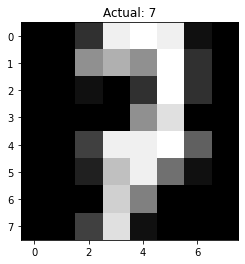

In [16]:
idx = np.random.randint(len(x))
img = x[idx].reshape(8, 8)
plt.imshow(img, cmap='gray')
plt.title('Actual: {}'.format(y[idx]))
plt.show()

Membagi set data menjadi _training set_ dan _test set_:

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
print('Training set size:', x_train.shape)
print('Test set size:', x_test.shape)

Training set size: (1437, 64)
Test set size: (360, 64)


- `x_train`: the part of x used to fit the model
- `x_test`: the part of x used to evaluate the model
- `y_train`: the part of y that corresponds to `x_train`
- `y_test`: the part of y that corresponds to `x_test`

Membuat dan melatih model:

In [18]:
model = LogisticRegression(solver='liblinear', random_state=0, multi_class='ovr', C=0.005)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Prediction set performance:')
print(classification_report(y_test, y_pred))

Prediction set performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.95      0.97      0.96        37
           2       1.00      1.00      1.00        39
           3       1.00      0.88      0.94        41
           4       1.00      0.98      0.99        41
           5       0.90      1.00      0.95        27
           6       0.97      0.97      0.97        30
           7       0.95      0.97      0.96        36
           8       0.89      0.94      0.91        34
           9       0.97      0.95      0.96        37

    accuracy                           0.96       360
   macro avg       0.96      0.97      0.96       360
weighted avg       0.97      0.96      0.96       360



_Confusion Matrix_:

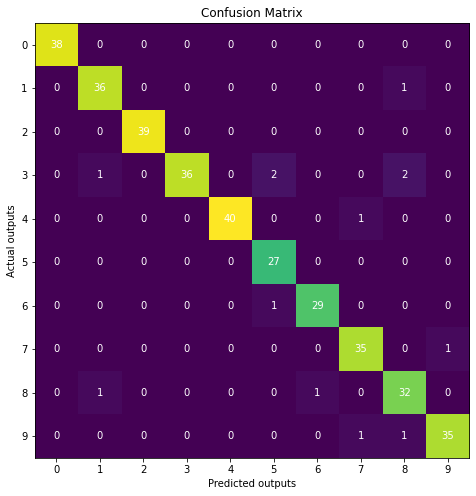

In [19]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs')
ax.set_ylabel('Actual outputs')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.title('Confusion Matrix')
plt.show()

Mendapatkan contoh acak hasil prediksi:

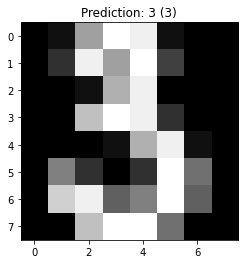

In [20]:
idx = np.random.randint(len(x_test))
img = x_test[idx].reshape(8, 8)
plt.imshow(img, cmap="gray")
plt.title("Prediction: {} ({})".format(y_pred[idx], y_test[idx]))
plt.show()

Mendapatkan contoh acak vektor yang seharusnya terprediksi sebagai angka 3 namun salah:

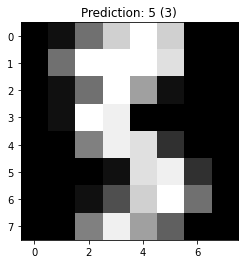

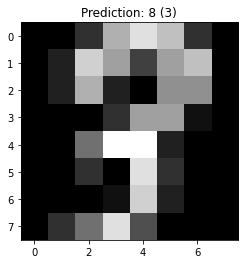

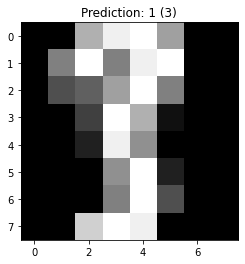

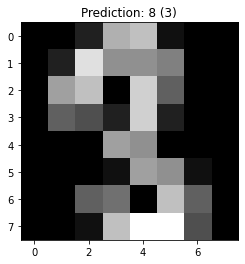

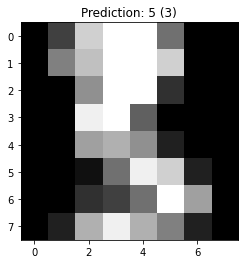

In [21]:
six_digits_idx = np.argwhere(y_test == 3).flatten()
for idx in six_digits_idx:
    if y_pred[idx] != 3:
        img = x_test[idx].reshape(8, 8)
        plt.imshow(img, cmap="gray")
        plt.title("Prediction: {} ({})".format(y_pred[idx], y_test[idx]))
        plt.show()

---

## K-Nearest Neighbor (KNN)

K adalah jumlah tetangga terdekat (_nearest neighbors_). Jumlah tetangga adalah faktor penentu utama. K umumnya bilangan ganjil jika jumlah kelasnya 2.

In [22]:
# First Feature
weather = ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 
'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy']

# Second Feature
temp = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']

# Label or target varible
play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

Perlu merepresentasikan kolom kategorikal dalam kolom numerik dengan encode data. Kita dapat memetakan setiap nilai menjadi sebuah angka, misalnya Overcast:0, Rainy:1, dan Sunny:2.

Proses ini dikenal sebagai _label encoding_, sklearn dengan mudah akan melakukannya menggunakan LabelEncoder.

In [23]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Creating labelEncoder
weather_le = LabelEncoder()
temp_le = LabelEncoder()
play_le = LabelEncoder()

# Converting string labels into numbers.
weather_enc = weather_le.fit_transform(weather)
temp_enc = temp_le.fit_transform(temp)
play_enc = play_le.fit_transform(play)

# Combining weather and temp into single listof tuples
features = list(zip(weather_enc, temp_enc))

print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


Membangun _classifier_ model KNN:

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn.fit(features, play_enc)

# Predict Output
predicted = knn.predict([[0, 1], [1, 1]])

print(predicted)

[1 0]


Melihat pembagian kelas-kelas dari data:

In [25]:
print(weather_le.classes_)
print(temp_le.classes_)
print(play_le.classes_)

['Overcast' 'Rainy' 'Sunny']
['Cool' 'Hot' 'Mild']
['No' 'Yes']


_Classification report_:

In [26]:
y_pred = knn.predict(features)
print(classification_report(play_enc, y_pred, target_names=play_le.classes_))

              precision    recall  f1-score   support

          No       0.60      0.60      0.60         5
         Yes       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14



### KNN with Multiple Labels

Menggunakan dataset hasil analisis kimiawi _wines_ yang ditanam di wilayah yang sama di Italia menggunakan tiga kultivar berbeda. Analisis menentukan jumlah 13 unsur yang ditemukan di masing-masing dari tiga jenis anggur.

In [27]:
from sklearn.datasets import load_wine

wine = load_wine()

print('Features:', wine.feature_names)
print('Target:', wine.target_names)

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target: ['class_0' 'class_1' 'class_2']


Periksa 5 _record_ teratas dari set _feature_:

In [28]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


Periksa _record set_ target:

In [29]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Membagi set data menjadi _training set_ dan _test set_:

In [30]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=11)
print('Training set size:', x_train.shape)
print('Test set size:', x_test.shape)

Training set size: (142, 13)
Test set size: (36, 13)


Membuat model untuk K=5

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

Evaluasi model untuk K=5

In [32]:
print("Training performance:")
print(classification_report(y_train, train_pred, target_names=wine.target_names))
print("Test performance:")
print(classification_report(y_test, test_pred, target_names=wine.target_names))

Training performance:
              precision    recall  f1-score   support

     class_0       0.87      0.91      0.89        45
     class_1       0.77      0.71      0.74        56
     class_2       0.67      0.71      0.69        41

    accuracy                           0.77       142
   macro avg       0.77      0.78      0.77       142
weighted avg       0.77      0.77      0.77       142

Test performance:
              precision    recall  f1-score   support

     class_0       0.88      1.00      0.93        14
     class_1       0.77      0.67      0.71        15
     class_2       0.43      0.43      0.43         7

    accuracy                           0.75        36
   macro avg       0.69      0.70      0.69        36
weighted avg       0.74      0.75      0.74        36



_Confusion Matrix_:

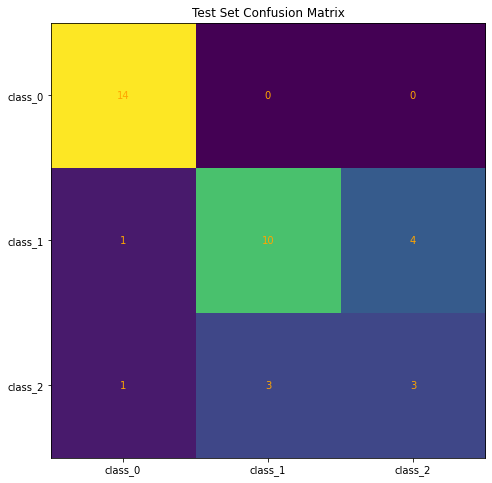

In [33]:
cm = confusion_matrix(y_test, test_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=wine.target_names)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=wine.target_names)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="orange")
plt.title("Test Set Confusion Matrix")
plt.show()

Membuat kembali model untuk K=7

In [34]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

Evaluasi model untuk K=7

In [35]:
print("Training performance:")
print(classification_report(y_train, train_pred, target_names=wine.target_names))
print("Test performance:")
print(classification_report(y_test, test_pred, target_names=wine.target_names))

Training performance:
              precision    recall  f1-score   support

     class_0       0.78      0.96      0.86        45
     class_1       0.79      0.73      0.76        56
     class_2       0.71      0.61      0.66        41

    accuracy                           0.77       142
   macro avg       0.76      0.77      0.76       142
weighted avg       0.76      0.77      0.76       142

Test performance:
              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       0.86      0.80      0.83        15
     class_2       0.57      0.57      0.57         7

    accuracy                           0.83        36
   macro avg       0.79      0.79      0.79        36
weighted avg       0.83      0.83      0.83        36



_Confusion Matrix_:

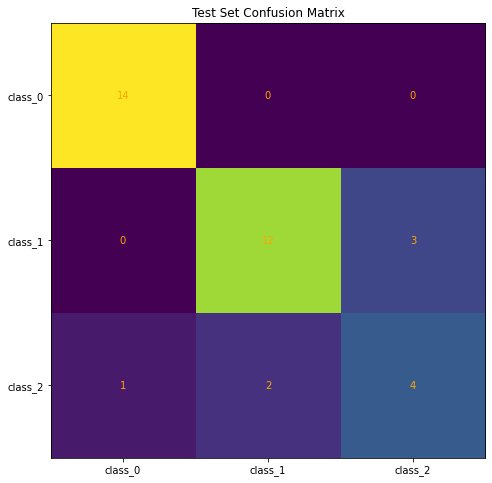

In [36]:
cm = confusion_matrix(y_test, test_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=wine.target_names)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=wine.target_names)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="orange")
plt.title("Test Set Confusion Matrix")
plt.show()

Saatnya meningkatkan model dan mencari tahu nilai K yang optimal:

In [37]:
errors = []
accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    accuracy = np.mean(pred == y_test)
    error = np.mean(pred != y_test)
    accuracies.append(accuracy)
    errors.append(error)

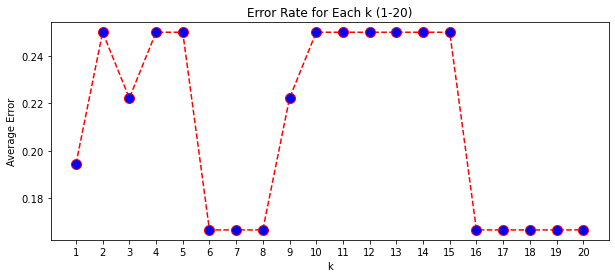

In [38]:
plt.figure(figsize=(10, 4))
plt.plot(range(1, 21), errors, color="red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize=10)
plt.title("Error Rate for Each k (1-20)")
plt.xlabel("k")
plt.xticks(range(1, 21))
plt.ylabel("Average Error")
plt.show()

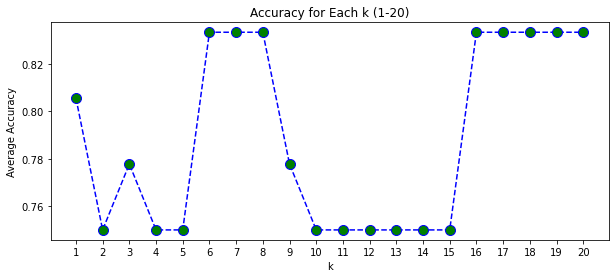

In [39]:
plt.figure(figsize=(10, 4))
plt.plot(range(1, 21), accuracies, color="blue", linestyle="dashed", marker="o", markerfacecolor="green", markersize=10)
plt.title("Accuracy for Each k (1-20)")
plt.xlabel("k")
plt.xticks(range(1, 21))
plt.ylabel("Average Accuracy")
plt.show()

In [40]:
print('Maximum accuracy:', round(max(accuracies), 5), 'at K =', 1 + accuracies.index(max(accuracies)))

Maximum accuracy: 0.83333 at K = 6
